In [2]:
import zipfile
with zipfile.ZipFile('nlp-getting-started.zip','r') as zip_ref:
    zip_ref.extractall('nlp')

In [3]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import re, string
import nltk
import spacy

In [4]:
train = pd.read_csv('nlp/train.csv')
test = pd.read_csv('nlp/test.csv')

In [5]:
pd.set_option('display.max_colwidth' , 200)

In [6]:
print(train.isnull().sum())
print('--'*20)
print(test.isnull().sum())

id             0
keyword       61
location    2533
text           0
target         0
dtype: int64
----------------------------------------
id             0
keyword       26
location    1105
text           0
dtype: int64


In [7]:
#Chekcing the data in train
print(train.shape)
print('--'*20)
print(train.duplicated().sum())

(7613, 5)
----------------------------------------
0


In [8]:
#checking the data in test
print(test.shape)
print('--'*20)
print(test.duplicated().sum())

(3263, 4)
----------------------------------------
0


([<matplotlib.patches.Wedge at 0x18aec695600>,
 [Text(-0.24110484190293122, 1.0732513476399472, 'Disaster'),
  Text(0.2411046798464836, -1.0732513840457532, 'Non Disaster')],
 [Text(-0.13151173194705337, 0.5854098259854257, '57.03%'),
  Text(0.1315116435526274, -0.585409845843138, '42.97%')])

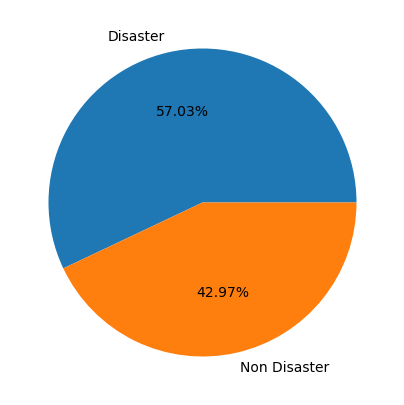

In [9]:
#checking the balance of the data , which is relatively equal and the data is not skewed
fig , ax = plt.subplots(figsize = (5,5))
plt.pie(train['target'].value_counts() , labels = ['Disaster', 'Non Disaster'],autopct="%0.2f%%")

In [10]:
#Generate the wordClouds

from wordcloud import WordCloud
non_disaster = [''.join(x) for x in train[train['target']==0]['text']]
non_disaster_str = ''.join(map(str , non_disaster))
disaster = [''.join(x) for x in train[train['target']==1]['text']]
disaster_str = ''.join(map(str,disaster))

non_disaster_cloud = WordCloud(width = 800 , height = 400 , max_words = 500 , background_color = 'white', random_state = 42).generate(non_disaster_str)
disaster_cloud = WordCloud(width = 800 , height = 400 , max_words = 500 , background_color = 'white',random_state = 42).generate(disaster_str)

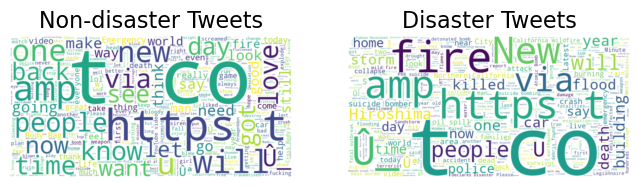

In [11]:
fig, ax = plt.subplots(1, 2, figsize=(8, 8))

# Correctly display the word cloud objects, not the strings
ax[0].imshow(non_disaster_cloud, interpolation='bilinear')
ax[1].imshow(disaster_cloud, interpolation='bilinear')

# Correct the reference to axes
for a in ax:
    a.axis('off')

# Add titles
ax[0].set_title('Non-disaster Tweets', fontsize=16)
ax[1].set_title('Disaster Tweets', fontsize=16)

# Show the figure
plt.show()

In [12]:
def preprocessing_complete(text):
    # Step 1: Lowercase the text
    text = text.lower()

    # Step 2: Remove URLs, HTML tags, and character references
    text = re.sub(r'((?:https?|ftp|file)://[-\w\d+=&@#/%?~|!:;\.,]*)','',text)
    text = re.sub(r'<.*?>', '', text)
    text = re.sub(r'&[a-zA-Z]+;?', '', text)

    # Step 3: Remove numeric values and mixtures
    text = re.sub(r'\w*\d+\w*', '', text)

    # Step 4: Remove punctuation, hashtags, mentions, and other symbols
    text = re.sub(r'[^a-z\s]', ' ', text)

    # Step 5: Remove extra spaces and leading/trailing spaces
    text = re.sub(r'\s+', ' ', text).strip()

    return text

In [13]:
train['text_clean'] = train['text'].apply(preprocessing_complete)
test['text_clean'] = test['text'].apply(preprocessing_complete)

In [16]:
#Number of Sentences
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\Pratham\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [17]:
from nltk.tokenize import sent_tokenize

train['sent_count'] = train['text'].apply(sent_tokenize).apply(len)
test['sent_count'] = test['text'].apply(sent_tokenize).apply(len)

In [18]:
# create a new feature for the number of words
from nltk.tokenize import word_tokenize
train['word_col'] = train['text'].apply(word_tokenize).apply(len)
test['word_col'] = test['text'].apply(word_tokenize).apply(len)

In [19]:
# create a new feature for the number of characters excluding white spaces
train['char_count'] = train['text'].apply(lambda x : len(x) - x.count(' '))
test['char_count'] = test['text'].apply(lambda x : len(x)-x.count(' '))

In [20]:
# define a function that returns the number of hashtags in a string
def hastag(string):
    spit = string.split()
    hastag = [w for w in spit if w.startswith('#')]
    return len(hastag)
train['hashtag'] = train['text'].apply(hastag)
test['hashtag'] = test['text'].apply(hastag)

In [21]:
def avg_words(string):
    words = string.split()
    length = sum([len(words[i]) for i in range (len(words))])
    avg =round(length/len(words),2)
    return avg
train['avg_words'] = train['text'].apply(avg_words)
test['avg_words'] = test['text'].apply(avg_words)

In [28]:
#lemmatize the text
nlp = spacy.load('en_core_web_sm')
train["text_clean"] = train["text_clean"].apply(lambda x:''.join([t.lemma_ for t in nlp(x)]))
test['text_clean'] = test['text_clean'].apply(lambda x:''.join([t.lemma_ for t in nlp(x)]))

In [32]:
#remove repeated characters 

def rm_rep(text):
    elongated = re.compile(r'(\S*)(a-z)\2{2,}')
    text = elongated.sub(r'\1\2',text)
    return text

train['text_clean'] = train['text_clean'].apply(rm_rep)
test['text_clean'] = test['text_clean'].apply(rm_rep)

In [34]:
def rm_mention(text):
    text = re.sub(r'@\w+','',text)
    return text

train['text_clean'] = train['text_clean'].apply(rm_mention)
test['text_clean'] = train['text_clean'].apply(rm_mention)

In [36]:
def rm_stopwords(text):
    stopwords = nlp.Defaults.stop_words
    textnostop = ''.join([token for token in text.split() if token not in stopwords])
    return textnostop

train['text_clean'] = train['text_clean'].apply(rm_stopwords)
test['text_clean'] = test['text_clean'].apply(rm_stopwords)

In [39]:
train

,id,keyword,location,text,target,text_clean,sent_count,word_col,char_count,hashtag,avg_words
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all,1,ourdeedbethereasonofthisearthquakemayallahforgiveweall,1,14,57,1,4.38
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,forestfirenearlarongesaskcanada,2,8,32,0,4.57
2,5,NaN,NaN,All residents asked to 'shelter in place' are being notified by officers. No other evacuation or shelter in place orders are expected,1,allresidentasktoshelterinplacebebenotifybyofficernootherevacuationorshelterinplaceorderbeexpect,2,24,112,0,5.09
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation orders in California",1,peoplereceivewildfireevacuationorderincalifornia,1,9,57,1,7.12
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as smoke from #wildfires pours into a school,1,justgetsendthisphotofromrubyalaskaassmokefromwildfirepourintoaschool,1,18,72,2,4.50
...,...,...,...,...,...,...,...,...,...,...,...
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse into nearby homes http://t.co/STfMbbZFB5,1,twogiantcraneholdabridgecollapseintonearbyhome,1,13,73,0,6.64
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control wild fires in California even in the Northern part of the state. Very troubling.,1,ariaahrarythetawnitheoutofcontrolwildfireincaliforniaeveninthenorthernpartofthestateverytroubling,2,24,106,0,5.30
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. http://t.co/zDtoyd8EbJ,1,utcsofvolcanohawaii,2,15,58,0,7.25
7611,10872,NaN,NaN,Police investigating after an e-bike collided with a car in Little Portugal. E-bike rider suffered serious non-life threatening injuries.,1,policeinvestigateafteranebikecollidewithacarinlittleportugalebikeridersufferseriousnonlifethreateninjury,2,21,119,0,6.26


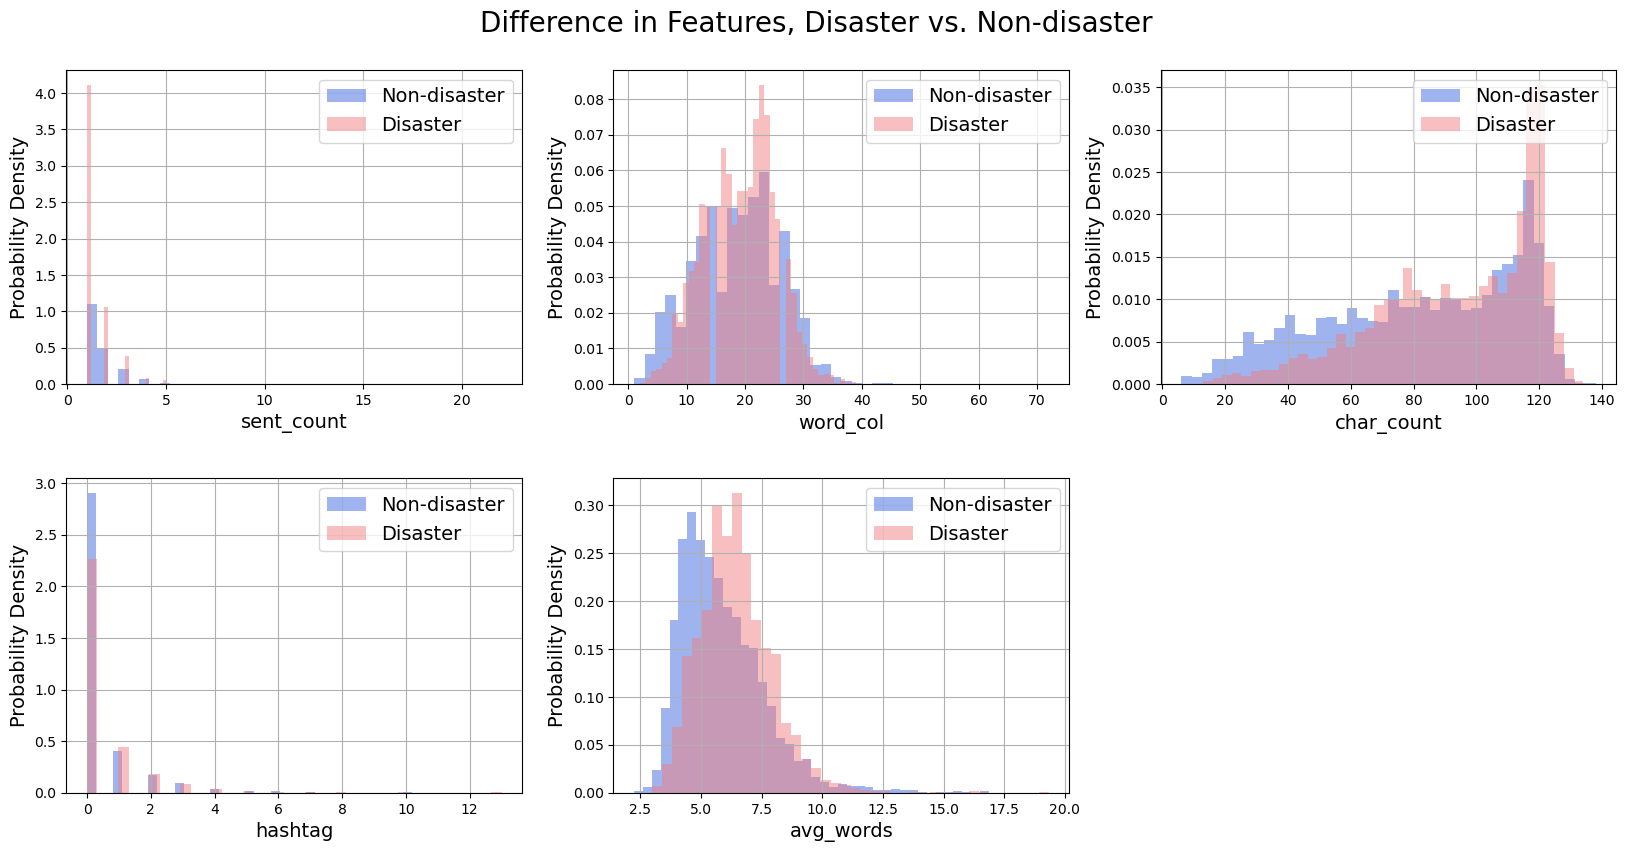

In [57]:
# store the features and their names in variables
features = ['sent_count', 'word_col', 'char_count', 'hashtag', 'avg_words']

# create the figure
fig = plt.figure(figsize=(20, 20))

# adjust the height of the padding between subplots to avoid overlapping
plt.subplots_adjust(hspace=0.3)

# add a centered suptitle to the figure
plt.suptitle("Difference in Features, Disaster vs. Non-disaster", fontsize=20, y=0.91)

# generate the histograms in a for loop
for i, feature in enumerate(features):
    
    # add a new subplot iteratively
    ax = plt.subplot(4, 3, i+1)
    ax = train[train['target']==0][feature].hist(alpha=0.5, label='Non-disaster', bins=40, color='royalblue', density=True)
    ax = train[train['target']==1][feature].hist(alpha=0.5, label='Disaster', bins=40, color='lightcoral', density=True)
    
    # set x_label, y_label, and legend
    ax.set_xlabel(features[i], fontsize=14)
    ax.set_ylabel('Probability Density', fontsize=14)
    ax.legend(loc='upper right', fontsize=14)
    

# shot the figure
plt.show()

In [102]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer()
x_tdfif = tdfif.fit_transform(train['text_clean'])
x_tdfif_pd = pd.DataFrame(x_tdfif.toarray())
x_tdfif_pd.head()

,0,1,2,3,4,5,6,7,8,9,...,6822,6823,6824,6825,6826,6827,6828,6829,6830,6831
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [61]:
x_tdfif_pd.columns = tdfif.get_feature_names_out()
x_tdfif_pd.columns

Index(['aaceorgibesurprisedwestillcannotstandardisedtheclinicalpracticeacrossthenhsambulancetrust',
       'aannnndredditwillnowquarantineoffensivecontent',
       'aaronthefmguytoscaredtoshowhisrealnameanywayheknowillbombhe',
       'aashiquiactressanuaggarwalonhernearfatalaccident',
       'abacktoschoolcommercialcomeonandmysisterhaveameltdown',
       'abandonedpicyoushoulddeletethisoneitsnotanabbandonednorsinkthatsthedarsenaofthecastelloscaligerodisirmione',
       'abcaircraftdebrisfindonlareunionbefrommissmalaysiaairlinesabconlineapieceofaircraftdebriswhich',
       'abcnewanuclearbombbeaterribleweapon',
       'abcnewsobamadeclaredisasterfortyphoondevastatesaipanobamasigndisasterdeclarationfornorthern',
       'abcnewsobamadeclaredisasterfortyphoondevastatesaipanobamasigndisasterdeclarationfornoworld',
       ...
       'zimbabwebeacountrywithacollapsegovernmentrulebyadictatorwhilemanylivebelowthepovertyline',
       'zodiacgirlfeattreydupreeproducebysparkzbeatzchuckdaarsonist',

In [65]:
x_features = pd.concat([train[['sent_count', 'word_col', 'char_count', 'hashtag', 'avg_words']],x_tdfif_pd],axis = 1)
x_features.shape

(7613, 6837)

In [84]:
from sklearn.model_selection import train_test_split
x = x_features
y = train['target']
x_train , x_val, y_train , y_val = train_test_split(x,y,test_size = 0.2 , random_state = 42)

In [85]:
random_state = 42
from sklearn.metrics import accuracy_score, precision_score, f1_score, recall_score
from sklearn.metrics import classification_report
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [86]:
clfs = {'mnb': MultinomialNB(), 
        'svc': SVC(random_state=random_state), 
        'lr': LogisticRegression(max_iter=10000, random_state=random_state), 
        'dtc': DecisionTreeClassifier(random_state=random_state),
        'knc': KNeighborsClassifier(n_jobs=-1), 
        'rfc': RandomForestClassifier(random_state=random_state, n_jobs=-1), 
        'gbc': GradientBoostingClassifier(random_state=random_state)}

In [87]:
def classify(clf, X_train, X_val, y_train, y_val):
    y_pred = clf.fit(X_train, y_train).predict(X_val)
    precision = precision_score(y_val, y_pred)
    fscore = f1_score(y_val, y_pred)
    train_accuracy = clf.score(X_train, y_train)
    test_accuracy = accuracy_score(y_val, y_pred)
    return precision, fscore, train_accuracy, test_accuracy

In [90]:
# create lists to store scores to build a dataframe later on
precision_series = []
fscore_series = []
train_accuracy_series = []
test_accuracy_series = []

# run the models with classify() function we created above (this takes some time)
for name, clf in clfs.items():
    i_precision, i_fscore, i_train_accuracy, i_test_accuracy = classify(clf,x_train, x_val, y_train, y_val)
    
    # append the scores to the lists
    precision_series.append(i_precision)
    fscore_series.append(i_fscore)
    train_accuracy_series.append(i_train_accuracy)
    test_accuracy_series.append(i_test_accuracy)
    
    # fit and predict
    y_pred = clf.fit(x_train, y_train).predict(x_val)
    
    # print out the scores and classification reports
    print('[{}]\nPrecision: {} | F1-score: {} | Train Accuracy: {} | Test Accuracy: {}\n'.format(name,
                                                                                                 round(i_precision, 2),
                                                                                                 round(i_fscore, 2),
                                                                                                 round(i_train_accuracy, 2),
                                                                                                 round(i_test_accuracy, 2)))
    print(classification_report(y_val, y_pred))

[mnb]
Precision: 0.68 | F1-score: 0.48 | Train Accuracy: 0.93 | Test Accuracy: 0.66

              precision    recall  f1-score   support

           0       0.65      0.87      0.75       874
           1       0.68      0.37      0.48       649

    accuracy                           0.66      1523
   macro avg       0.67      0.62      0.61      1523
weighted avg       0.66      0.66      0.63      1523

[svc]
Precision: 0.6 | F1-score: 0.55 | Train Accuracy: 0.64 | Test Accuracy: 0.65

              precision    recall  f1-score   support

           0       0.67      0.75      0.71       874
           1       0.60      0.51      0.55       649

    accuracy                           0.65      1523
   macro avg       0.64      0.63      0.63      1523
weighted avg       0.64      0.65      0.64      1523

[lr]
Precision: 0.66 | F1-score: 0.58 | Train Accuracy: 0.85 | Test Accuracy: 0.68

              precision    recall  f1-score   support

           0       0.69      0.80     

In [92]:
# fit the model
rfc_model = clfs.get('rfc').fit(x_train, y_train)

# check the feature_importances
sorted(zip(rfc_model.feature_importances_, x_train.columns), reverse=True)[0:10]

[(np.float64(0.10176462233119955), 'avg_words'),
 (np.float64(0.08152572270704547), 'char_count'),
 (np.float64(0.056612683688523874), 'word_col'),
 (np.float64(0.024374125517289017), 'sent_count'),
 (np.float64(0.015636849361074408), 'hashtag'),
 (np.float64(0.0031016224487364083),
  'watchthisairportgetswallowupbyasandstorminunderaminute'),
 (np.float64(0.0023797493617310154),
  'wreckageconclusivelyconfirmasfrommalaysiapminvestigatorandthefamilyofthosewhobe'),
 (np.float64(0.0019058943160321505),
  'familytosueoverlegionnairemorethanfamilyaffectbythefataloutbreakoflegionnairedisea'),
 (np.float64(0.0017840432402280216),
  'thelatemorehomerazebynortherncaliforniawildfireabcnews'),
 (np.float64(0.0016123945917871038),
  'rlytragedyinmpsomelivetorecounthorrorwheniseecoachofmytrainplungeintowatericall')]

In [93]:
# create a dataframe with the scores
scores_df = pd.DataFrame({'Algorithm': clfs.keys(),
                          'Precision': precision_series,
                          'F1 Score': fscore_series,
                          'Train Accuracy': train_accuracy_series,
                          'Test Accuracy': test_accuracy_series}).round(2).sort_values('Test Accuracy', ascending=False)
# check the dataframe
scores_df

,Algorithm,Precision,F1 Score,Train Accuracy,Test Accuracy
5,rfc,0.66,0.61,0.99,0.69
6,gbc,0.64,0.61,0.68,0.68
2,lr,0.66,0.58,0.85,0.68
0,mnb,0.68,0.48,0.93,0.66
1,svc,0.60,0.55,0.64,0.65
3,dtc,0.59,0.56,0.99,0.64
4,knc,0.58,0.55,0.75,0.63


C:\Users\Pratham\AppData\Local\Temp\ipykernel_27228\288305661.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Algorithm', y=metric, data=scores_df.sort_values(metric, ascending=False), palette=colors)
C:\Users\Pratham\AppData\Local\Temp\ipykernel_27228\288305661.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Algorithm', y=metric, data=scores_df.sort_values(metric, ascending=False), palette=colors)
C:\Users\Pratham\AppData\Local\Temp\ipykernel_27228\288305661.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot

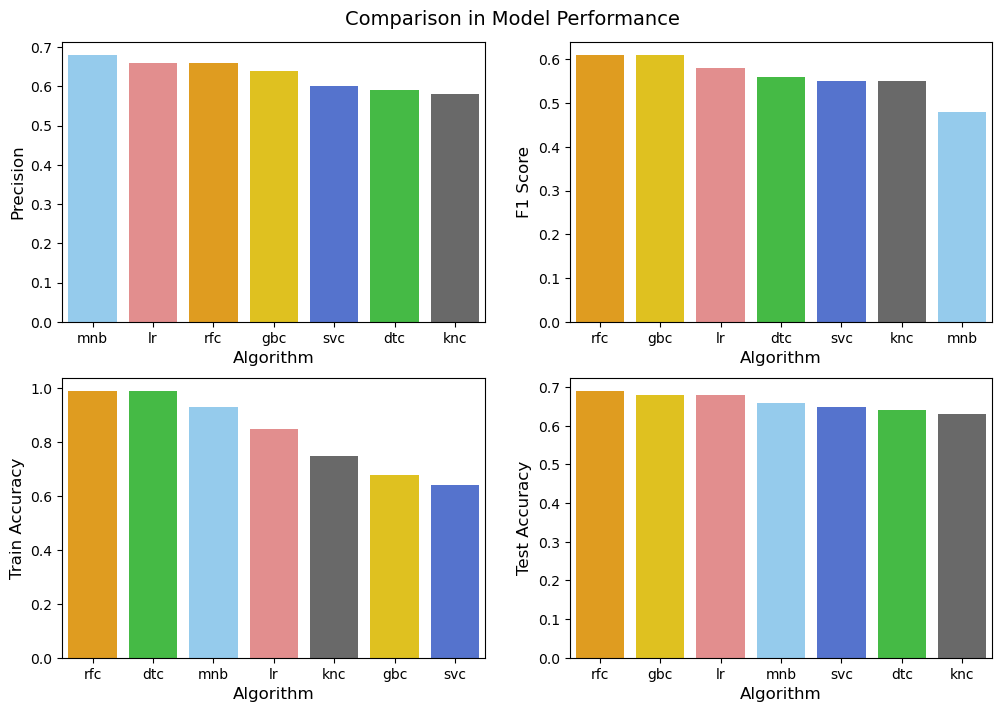

In [94]:
# create a list of metrics
metrics = ['Precision', 'F1 Score', 'Train Accuracy', 'Test Accuracy']

# create the figure
fig = plt.figure(figsize=(12, 8))

# adjust the height of the padding between subplots to avoid overlapping
#plt.subplots_adjust(hspace=0.3)

# set the color palette
colors = {'lr':'lightcoral',
          'mnb':'lightskyblue',
          'rfc':'orange',
          'gbc':'gold',
          'dtc':'limegreen',
          'svc':'royalblue',
          'knc':'dimgray'}

# add a centered suptitle to the figure
plt.suptitle('Comparison in Model Performance', fontsize=14, y=0.92)

# generate the histograms in a for loop
for i, metric in enumerate(metrics):
    
    # add a new subplot iteratively
    ax = plt.subplot(2, 2, i+1)
    ax = sns.barplot(x='Algorithm', y=metric, data=scores_df.sort_values(metric, ascending=False), palette=colors)
    
    # set x_label, y_label
    ax.set_xlabel('Algorithm', fontsize=12)
    ax.set_ylabel(metric, fontsize=12)
    
# show the plots
plt.show()

In [103]:
# fit the cleaned text to the vectorizer
tfidf_vect_fit = tfidf.fit(train['text_clean'])

# create the vectorized columns
tfidf_train = tfidf_vect_fit.transform(train['text_clean'])
tfidf_test = tfidf_vect_fit.transform(test['text_clean'])

In [104]:
# create dataframes from the sparse matrices
tfidf_train_df = pd.DataFrame(tfidf_train.toarray())
tfidf_test_df = pd.DataFrame(tfidf_test.toarray())

# get the feature names from our stored vectorizers and assign them to tfidf_train_df and tfidf_test_df
# to avoid getting 'FutureWarning: Feature names only support names that are strings.'
tfidf_train_df.columns = tfidf.get_feature_names_out()
tfidf_test_df.columns = tfidf.get_feature_names_out()

In [107]:
X_train_vect = pd.concat([train[['sent_count', 'word_col', 'char_count', 'hashtag', 'avg_words']].reset_index(drop=True),
                          tfidf_train_df], axis=1)
X_test_vect = pd.concat([test[['sent_count', 'word_col', 'char_count', 'hashtag', 'avg_words']].reset_index(drop=True),
                         tfidf_test_df], axis=1)

# store the labels
y_train = train['target']

# check the shape
print(X_train_vect.shape, X_test_vect.shape)

(7613, 6837) (3263, 6837)


In [114]:
import time
# fit the model and check the processing time
start = time.time()
final_model = LogisticRegression(max_iter = 10000 , random_state = 42)
final_model_fit = final_model.fit(X_train_vect, y_train)
end = time.time()
fit_time = end - start

# make predictions and check the processing time
start = time.time()
final_pred = final_model.predict(X_test_vect)
end = time.time()
pred_time = end - start

print('Fit time: {} secs | Predict time: {} secs'.format(round(fit_time, 2), round(pred_time, 2)))

Fit time: 11.97 secs | Predict time: 0.14 secs


In [115]:
# create a dataframe for submission
submission = test[['id']].reset_index(drop=True)
submission['target'] = final_pred.astype('int64')

In [116]:
submission

,id,target
0,0,0
1,2,1
2,3,0
3,9,0
4,11,0
...,...,...
3258,10861,0
3259,10865,0
3260,10868,1
3261,10874,0


In [118]:
submission.to_csv('submission.csv', index=False)